## Regularized Linear Regression and Bias vs Variance
---
The aim of this exercise is to study Bias and Variance by plotting various learning curves. Linear regression being an easy model is used to study the Bias and Variance in a model 

## 1. Regularized Linear Regression
---
In this part, we will implement regularized linear regression to predict the amount of water flowing out of a dam using the change of water level in a reservoir.

#### Importing Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
%matplotlib inline

#### Method to do inference

In [2]:
def predict(X,theta):
	return np.dot(X, theta)

#### Cost Function

In [3]:
def cost(X,y,theta,lambd):
    hyp = predict(X,theta)
    sq_err = ( (1/(2*len(X))) * np.sum((hyp-y)**2) ) + ( (lambd/(2*len(X))) * (theta[1:]**2) )
    return sq_err

#### Initializing the data

In [4]:
data = loadmat('ex5data1.mat')

X = np.array(data['X'])
y = np.array(data['y'])

Xval = np.array(data['Xval'])
yval = np.array(data['yval'])

Xtest = np.array(data['Xtest'])
ytest = np.array(data['ytest'])

Xmean = X.mean()
Xstd = X.std()

ymean = y.mean()
ystd = y.std()

#X = (X - Xmean)/Xstd
#Xval = (Xval - Xmean)/Xstd
Xtest = (Xtest - Xmean)/Xstd

X = np.insert(X,0,values=1,axis=1)
Xval = np.insert(Xval,0,values=1,axis=1)
Xtest = np.insert(Xtest,0,values=1,axis=1)
#y = (y-ymean)/ystd
#yval = (yval - ymean)/ystd
ytest = (ytest - ymean)/ystd

In [5]:
# Initializing Weight vector
theta = np.array([[1],[1]])
#Hyperparameters
lambd = 1
alpha = 0.001
iters = 1000
m = len(X)

#error_train and error_val store the training and cross validation errors respectively
error_train = []
error_val = []

In [6]:
for curr_m in range(1,m+1):
    for i in range(iters):
#         if i%100==0:
#             print("Cost:" + str(cost(X[:curr_m,:], y[:curr_m,:], theta, lambd=0)))
        grad = (1.0/curr_m) * np.dot(X[:curr_m,:].T, predict(X[:curr_m,:],theta)-y[:curr_m,:])
        reg = (lambd) * theta
        #Do not regularize bias
        reg[0] = 0
        update = grad+reg
        theta = theta - alpha*update
    error_train.append(cost(X[:curr_m,:], y[:curr_m,:], theta, lambd=0).squeeze())
    error_val.append(cost(Xval, yval, theta, lambd=0).squeeze())

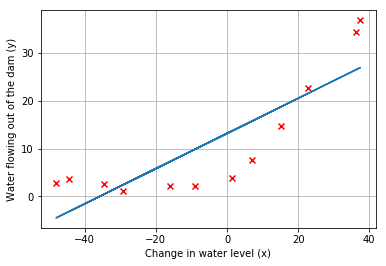

In [7]:
plt.scatter(X[:,1],y, marker='x',color='red')
plt.plot(X[:,1], predict(X,theta))
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.grid()

## Bias-Variance
---
In this part, train and test errors on a learning curve will be plotted to diagnose bias-variance problems.

#### Learning Curves
A learning curve plots training and cross validation error as a function of training set size

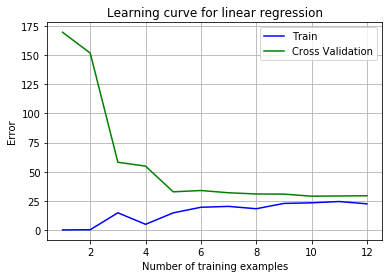

In [8]:
plt.plot(range(1,m+1), error_train, color='blue', label='Train')
plt.plot(range(1,m+1), error_val, color='green', label='Cross Validation')
plt.legend()
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.grid()

#### Polynomial Regression
We see that above model resulted in High Bias. So now, we add more features. New features are powers of the original feature. So x2 = (x1)^2, x3 = (x1)^3 ... xp = (x1)^p

In [9]:
def mapFeatures(X,p):
    x = pd.DataFrame(X.copy())
    for i in range(2,p+1):
        x[i] = X[:,1]**i
    return np.array(x)

In [10]:
#Initializing data
X = data['X']
y = data['y']

Xval = data['Xval']
yval = data['yval']

X = np.insert(X,0,1,axis=1)
Xval = np.insert(Xval,0,1,axis=1)

X = mapFeatures(X, 8)
Xval = mapFeatures(Xval, 8)

#Feature scaling
Xmean = X.mean(axis=0)
Xstd = X.std(axis=0)
ymean = y.mean()
ystd = y.std()

X[:,1:] = (X[:,1:]-Xmean[1:])/Xstd[1:]
y = (y-ymean)/ystd

Xval[:,1:] = (Xval[:,1:]-Xmean[1:])/Xstd[1:]
yval = (yval-ymean)/ystd

error_train = []
error_val = []

#Hyperparameters
lambd=0
alpha = 0.005
iters=1000

In [11]:
#Training - Incresing 1 sample at a time and recording error
for curr_m in range(1,m+1):
    #Reinitializing theta after adding one new sample
    theta = np.ones([X.shape[1],1])
    for i in range(iters):
        grad = (1.0/curr_m) * np.dot(X[:curr_m,:].T, predict(X[:curr_m,:],theta)-y[:curr_m,:])
        reg = (lambd) * theta
        #Do not regularize bias
        reg[0] = 0
        update = grad+reg
        theta = theta - alpha*update
    error_train.append(cost(X[:curr_m,:], y[:curr_m,:], theta, lambd=0).squeeze()[0])
    error_val.append(cost(Xval, yval, theta, lambd=0).squeeze()[0])

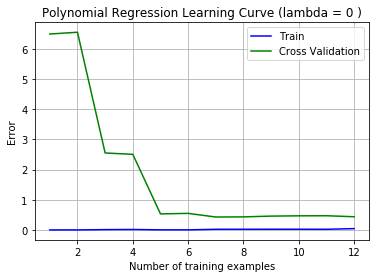

In [12]:
#Plotting Learning Curve
plt.plot(range(1,m+1), error_train, color='blue', label='Train')
plt.plot(range(1,m+1), error_val, color='green', label='Cross Validation')
plt.legend()
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.title('Polynomial Regression Learning Curve (lambda = ' + str(lambd) + " )")
plt.grid(True)

In [13]:
#Retraining to show High Variance
#Retraining is done on the entire data
X = data['X']
y = data['y']

X = np.insert(X,0,1,axis=1)
X = mapFeatures(X,8)
#Feature scaling
mean = X.mean(axis=0)
std = X.std(axis=0)
X[:,1:] = (X[:,1:] - mean[1:])/std[1:]

#Initializing theta
theta = np.ones([X.shape[1],1])

#Hyperparameters
alpha=0.3
iters= 1000
lambd=0

#Gradient Descent
for i in range(iters):
    if i%100==0:
        print("Cost:" + str(cost(X, y, theta, lambd=0)[0]))
    grad = (1.0/curr_m) * np.dot(X.T, predict(X,theta)-y)
    reg = (lambd) * theta
    #Do not regularize bias
    reg[0] = 0
    update = grad+reg
    theta = theta - alpha*update

Cost:[103.65317443]
Cost:[1.05950719]
Cost:[0.44920068]
Cost:[0.36660928]
Cost:[0.33259595]
Cost:[0.3098026]
Cost:[0.29271056]
Cost:[0.27956371]
Cost:[0.26933751]
Cost:[0.26130164]


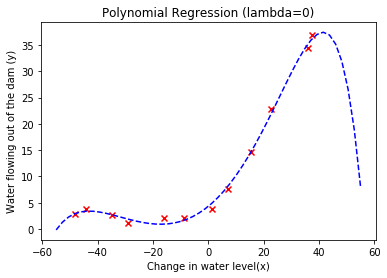

In [14]:
plt_x = np.array(data['X'])
plt_y = np.array(data['y'])

plt.scatter(plt_x, plt_y, marker='x', color='red')

xvals = np.linspace(-55,55, 50).reshape(-1,1)
xvals = np.insert(xvals,0,1,axis=1)
yvals = np.zeros((xvals.shape[0],9))

for i in range(len(xvals)):
    yvals[i] = mapFeatures(np.array([xvals[i]]), 8)

yvals[:,1:] = (yvals[:,1:] - mean[1:])/std[1:]
plt.title('Polynomial Regression (lambda=' + str(lambd) + ")")
plt.xlabel('Change in water level(x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(xvals[:,1:],predict(yvals,theta), 'b--')

#### Selecting lambda using cross validation set

In [15]:
#Initializing data
X = data['X']
y = data['y']

Xval = data['Xval']
yval = data['yval']

X = np.insert(X,0,1,axis=1)
Xval = np.insert(Xval,0,1,axis=1)

X = mapFeatures(X, 8)
Xval = mapFeatures(Xval, 8)

#Feature scaling
Xmean = X.mean(axis=0)
Xstd = X.std(axis=0)
ymean = y.mean()
ystd = y.std()

X[:,1:] = (X[:,1:]-Xmean[1:])/Xstd[1:]
y = (y-ymean)/ystd

Xval[:,1:] = (Xval[:,1:]-Xmean[1:])/Xstd[1:]
yval = (yval-ymean)/ystd

error_train = []
error_val = []

#Hyperparameters
#Trying out different values of lambda
lambdas = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
alpha = 0.001
iters=1000

m = len(X)

In [16]:
#Training - Trying out different lambdas
for curr_lambda in lambdas:
    #Reinitializing theta
    theta = np.ones([X.shape[1],1])
    for i in range(iters):
        grad = (1.0/m) * np.dot(X.T, predict(X,theta)-y)
        reg = (curr_lambda) * theta
        #Do not regularize bias
        reg[0] = 0
        update = grad+reg
        theta = theta - alpha*update
    error_train.append(cost(X, y, theta, lambd=curr_lambda).squeeze()[0])
    error_val.append(cost(Xval, yval, theta, lambd=curr_lambda).squeeze()[0])

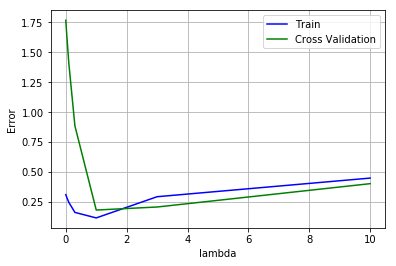

In [17]:
#Plotting Learning Curve
plt.plot(lambdas, error_train, color='blue', label='Train')
plt.plot(lambdas, error_val, color='green', label='Cross Validation')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('Error')
plt.grid()